In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv("BlackFriday.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## Treating Null Values

In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
data.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


Dropping rows with null values will result in the loss of 70% of tha data, hence will delete columns, with null values: Product_Category_2 and Product_Category_3. Deleting these columns will not have any effect on the analysis.

In [32]:
del data['Product_Category_2']
del data['Product_Category_3']
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Treating Duplicated Values

In [14]:
data.duplicated().sum() 

0

No duplicates in the data set

## Analyzing Columns

In [17]:
data['User_ID'].nunique()

5891

In [18]:
data['Product_ID'].nunique()

3623

In [19]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [21]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
data['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [24]:
data['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [25]:
data['Purchase'].sum()/len(data['Purchase']) #Average amount spent by user on a product

9333.859852635065

In [58]:
for column in data.columns: #No. of unique values in each column
    print(column,':',data[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analyzing Gender

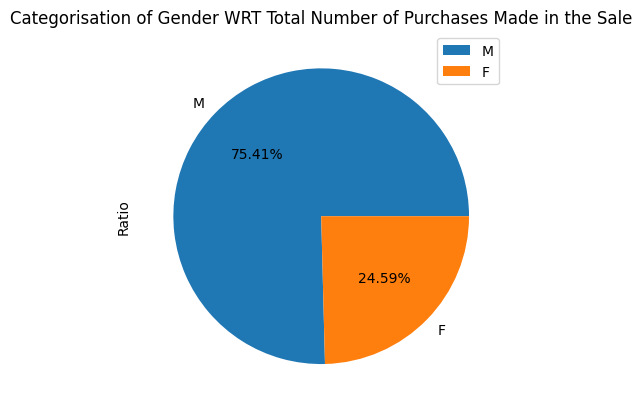

In [66]:
data['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',ylabel='Ratio')
plt.title('Categorisation of Gender WRT Total Number of Purchases Made in the Sale')
plt.legend()
plt.show()

In [67]:
revenue_male= data[data['Gender']=='M']['Purchase'].sum()
revenue_female = data[data['Gender']=='F']['Purchase'].sum()

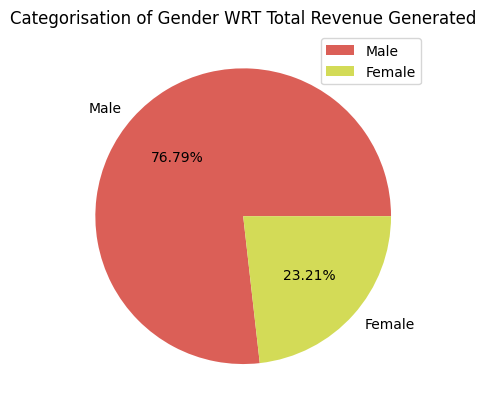

In [68]:
palette = sns.color_palette("hls")
plt.pie(x=[revenue_male,revenue_female],labels=['Male','Female'],colors=palette,autopct='%1.2f%%')
plt.legend()
plt.title('Categorisation of Gender WRT Total Revenue Generated')
plt.show()

In [69]:
spent_per_prod_male = data[data['Gender']=='M']['Purchase'].mean()
spent_per_prod_female = data[data['Gender']=='F']['Purchase'].mean()

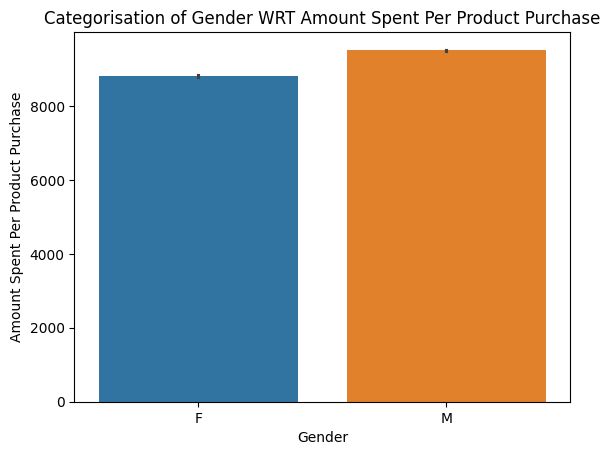

Male: 9504.771712960679 
Female: 8809.761348593387


In [70]:
sns.barplot(data=data, x='Gender',y='Purchase',hue='Gender')
plt.title('Categorisation of Gender WRT Amount Spent Per Product Purchase')
plt.ylabel('Amount Spent Per Product Purchase')
plt.show()
print('Male:',spent_per_prod_male,'\nFemale:',spent_per_prod_female)

Conclusion: Male customers generated more revenue due to their overall greater participation in the sale, with both genders spending similarly per product. 

Note: Particpation by a category implies overall number of purchases made by the category.

## Analyzing Age and Marital Status

In [81]:
data.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

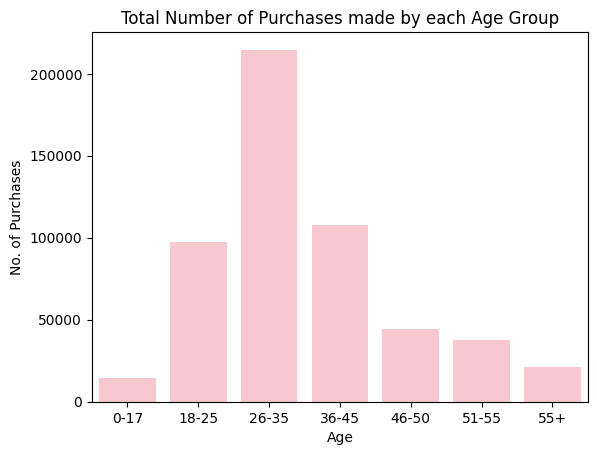

In [55]:
sns.barplot(data=data.groupby('Age').size(),color='Pink')
plt.ylabel('No. of Purchases')
plt.title('Total Number of Purchases made by each Age Group')
plt.show()

In [21]:
DF=data.groupby('Age').sum(numeric_only = True)['Purchase'].reset_index().sort_values(by='Age')
DF

,Age,Purchase
0,0-17,132659006
1,18-25,901669280
2,26-35,1999749106
3,36-45,1010649565
4,46-50,413418223
5,51-55,361908356
6,55+,197614842


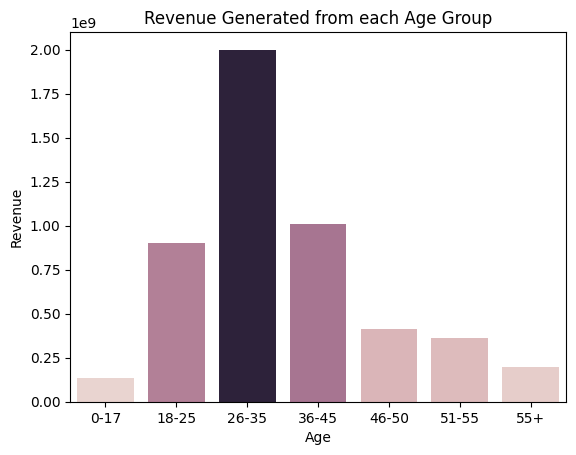

In [45]:
sns.barplot(data =DF, x = 'Age', y = 'Purchase', hue='Purchase', legend=False)
plt.ylabel('Revenue')
plt.title("Revenue Generated from each Age Group")
plt.show()

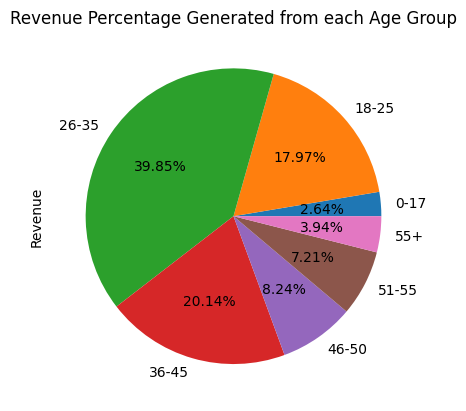

In [29]:
DF.set_index('Age')['Purchase'].plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('Revenue')
plt.title("Revenue Percentage Generated from each Age Group")
plt.show()

In [35]:
df2 = data.groupby('Age').mean(numeric_only = True)['Purchase'].reset_index().sort_values(by='Age')
df2

,Age,Purchase
0,0-17,9020.126878
1,18-25,9235.197575
2,26-35,9314.588970
3,36-45,9401.478758
4,46-50,9284.872277
5,51-55,9620.616620
6,55+,9453.898579


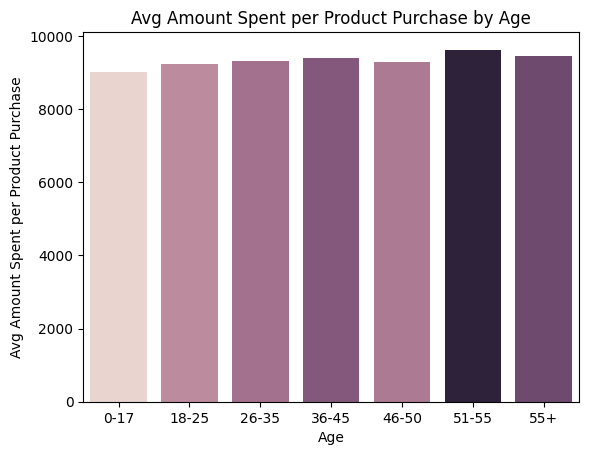

In [59]:
sns.barplot(data =df2, x = 'Age', y = 'Purchase', hue='Purchase', legend=False)
plt.ylabel('Avg Amount Spent per Product Purchase')
plt.title("Avg Amount Spent per Product Purchase by Age")
plt.show()

In [47]:
lst=[]
for i in data['Age'].unique():
    lst.append([i, data[data['Age']==i]['Product_ID'].nunique()])

df=pd.DataFrame(lst,columns=['Age','No. of Unique Products'])
df.sort_values(by='Age')

,Age,No. of Unique Products
0,0-17,2300
6,18-25,3213
2,26-35,3419
5,36-45,3318
3,46-50,3099
4,51-55,2877
1,55+,2573


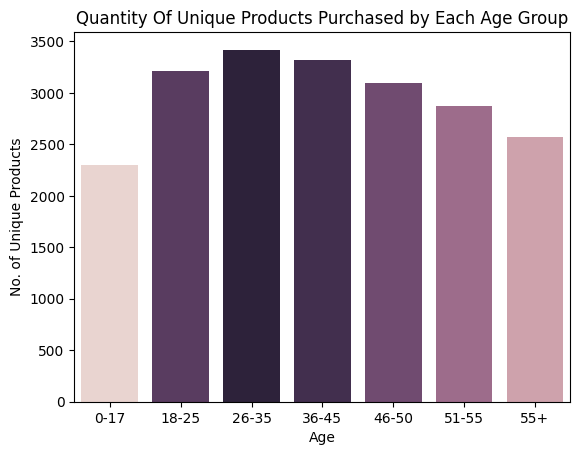

In [48]:
sns.barplot(data = df.sort_values(by='Age'), x = 'Age', y = 'No. of Unique Products', hue='No. of Unique Products', legend=False)
plt.title('Quantity Of Unique Products Purchased by Each Age Group')
plt.show()

Conclusion:  All age groups spent similarly per product, but those between 18-45 participated far more in the sale, hence most of the business comes from this age group. The bar graph showing the range of unique products bought by each age group helps manage inventory and analyze product catering for different age categories.

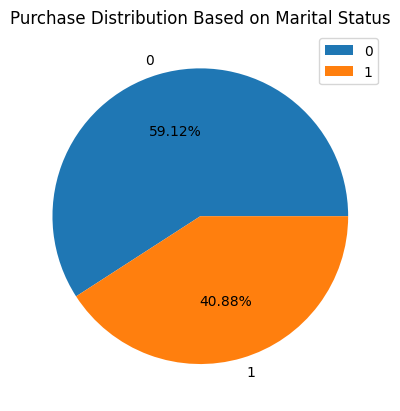

In [52]:
data.groupby('Marital_Status').size().plot(kind='pie', autopct='%1.2f%%')
plt.legend()
plt.title("Purchase Distribution Based on Marital Status")
plt.show()

## Multi-Column Analysis

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


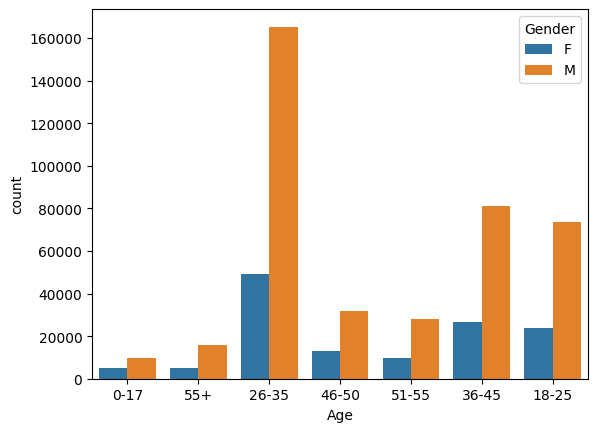

In [19]:
sns.countplot(data=data, x= 'Age',hue='Gender')
plt.show()

Conclusion: Irrespective of age group, overall participation of males in the sale is high.

<Axes: xlabel='Marital_Status', ylabel='count'>

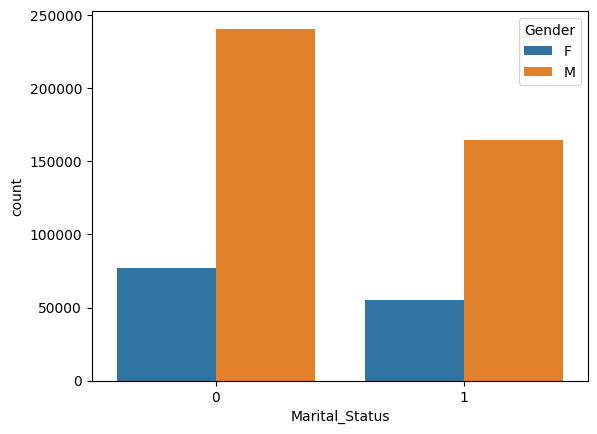

In [74]:
sns.countplot(data=data, x= 'Marital_Status',hue='Gender')

Conclusion: Irrespective of marital status, overall participation of males in the sale is high.

<Axes: xlabel='City_Category', ylabel='count'>

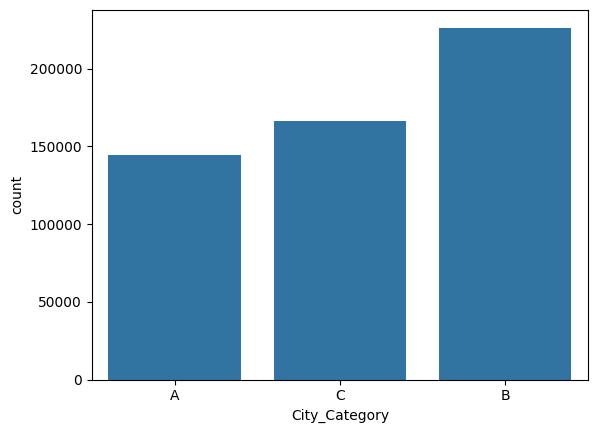

In [5]:
sns.countplot(x=data['City_Category'])

Conclusion: Overall participation in the sale from city B was greater than city C and A. 

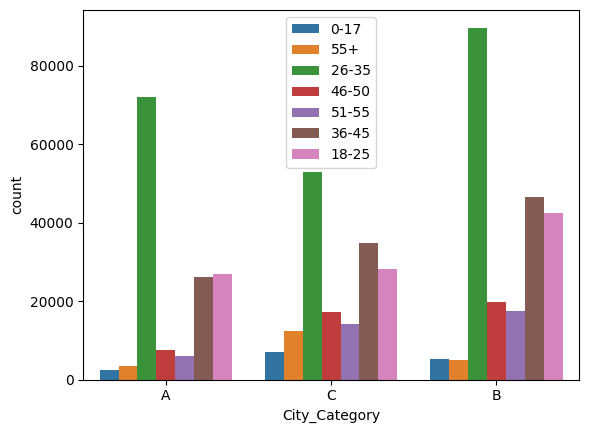

In [10]:
sns.countplot(data=data, x='City_Category',hue='Age')
plt.legend(loc='best')

Conclusion: Irrespective of city, overall participation of age group 26-35 in the sale is high. 
For age group 18-25, participation in the sale is approximately same in city, A and C.

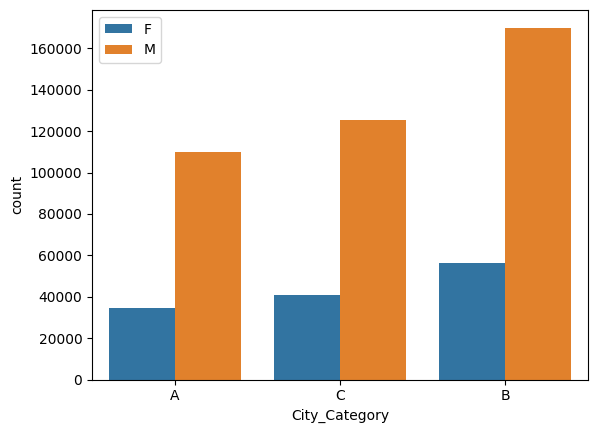

In [13]:
sns.countplot(data=data, x='City_Category',hue='Gender')
plt.legend(loc='best')

Conclusion: Irrespective of city, overall participation of males in the sale is high.

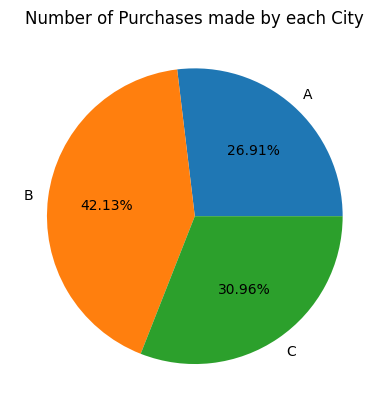

In [20]:
data.groupby('City_Category').size().plot(kind='pie', autopct='%1.2f%%')
plt.title("Number of Purchases made by each City")
plt.show()

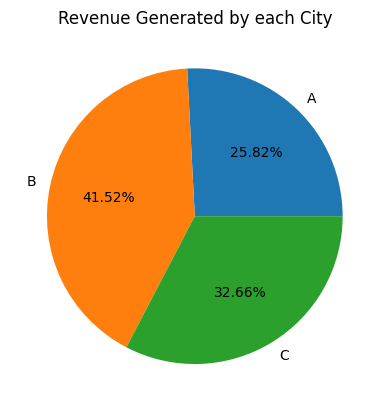

In [23]:
data.groupby('City_Category').sum(numeric_only = True)['Purchase'].plot(kind='pie', autopct='%1.2f%%')
plt.title("Revenue Generated by each City")
plt.ylabel(None)
plt.show()

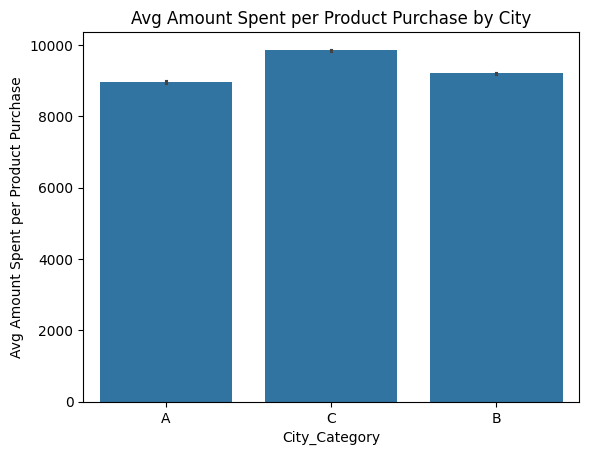

In [25]:
sns.barplot(data=data, x = 'City_Category', y = 'Purchase')
plt.ylabel('Avg Amount Spent per Product Purchase')
plt.title("Avg Amount Spent per Product Purchase by City")
plt.show()

Conclusion : City C customers spent more per purchase, contributing 33% of the revenue from 30% of the purchases, indicating they likely bought more expensive items. In contrast, City A's spending was average, with 27% of purchases generating 26% of the revenue. City B had the highest purchase volume, with spending similar to City A.

## Occupation and Products Analysis

In [33]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


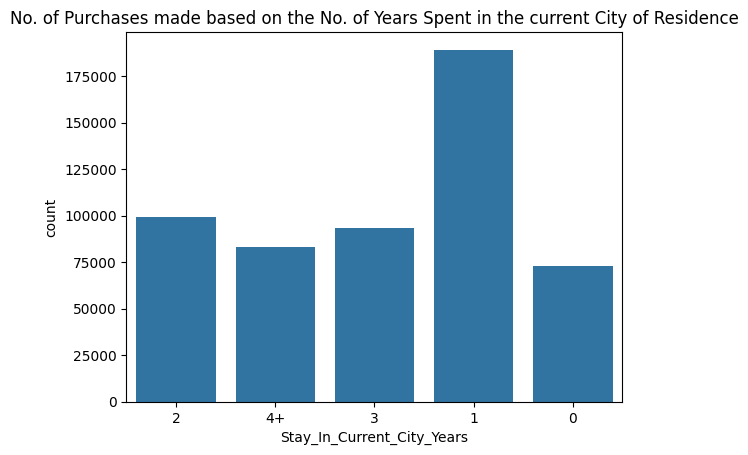

In [120]:
sns.countplot(data=data, x = 'Stay_In_Current_City_Years')
plt.title('No. of Purchases made based on the No. of Years Spent in the current City of Residence')
plt.show()

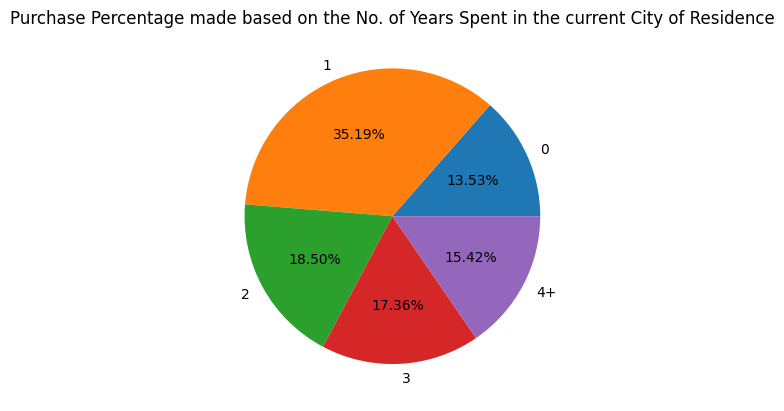

In [116]:
data.groupby('Stay_In_Current_City_Years').size().plot(kind='pie', autopct='%1.2f%%')
plt.title('Purchase Percentage made based on the No. of Years Spent in the current City of Residence')
plt.show()

Conclusion: Overall participation in the sale is highest among people who have lived in their city of residence for one year.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

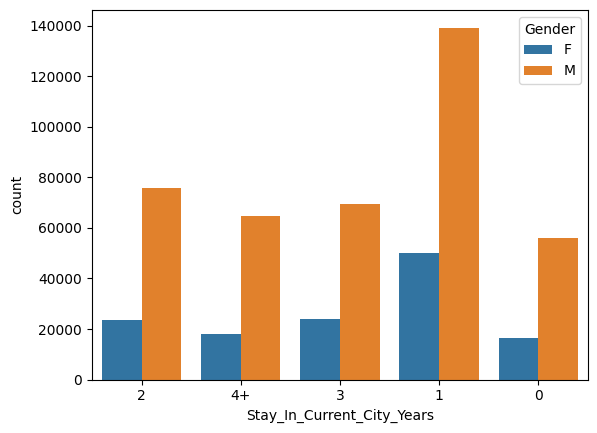

In [36]:
sns.countplot(data=data, x = 'Stay_In_Current_City_Years', hue='Gender')

Conclusion : Irrespective of years spend in the current city, male participatiion in the sales is high. Highset overall partcipation in the sales, is from males who have lived in their city of residence for one year.

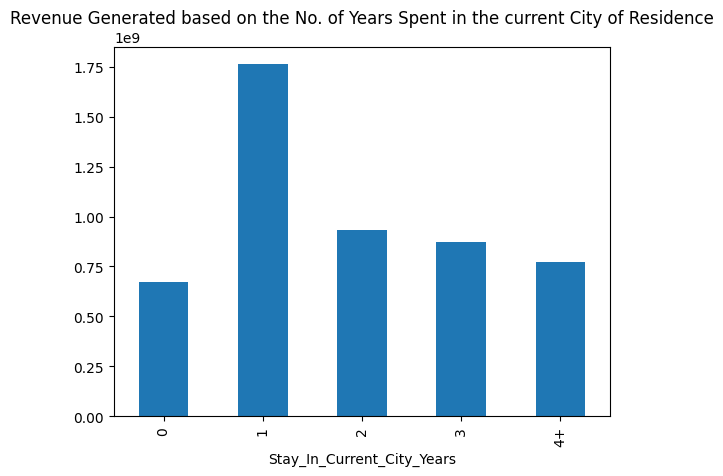

In [117]:
data.groupby('Stay_In_Current_City_Years').sum(numeric_only=True)['Purchase'].plot(kind='bar')
plt.title('Revenue Generated based on the No. of Years Spent in the current City of Residence')
plt.show()

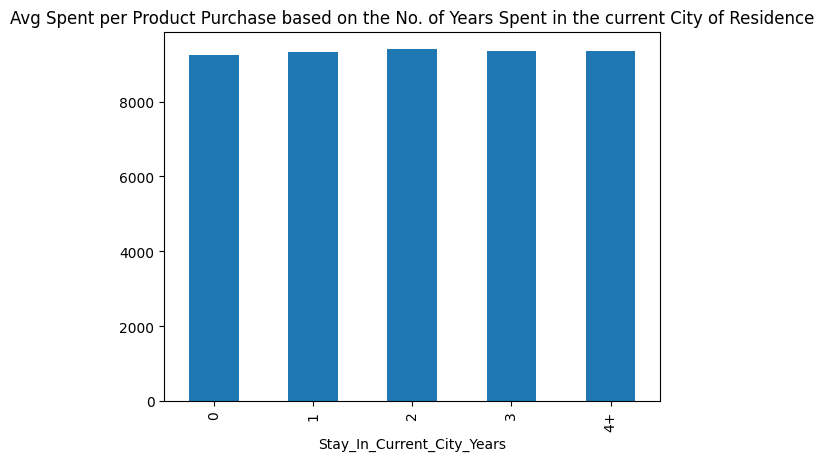

In [118]:
data.groupby('Stay_In_Current_City_Years').mean(numeric_only=True)['Purchase'].plot(kind='bar')
plt.title('Avg Spent per Product Purchase based on the No. of Years Spent in the current City of Residence')
plt.show()

Conclusion: Irrespective of years spend in the current city, amount spent per Product Purchase is similar, but due to greater overall participation in the sale is highest among people who have lived in their city of residence for one year, the revenue generated from them is highest.

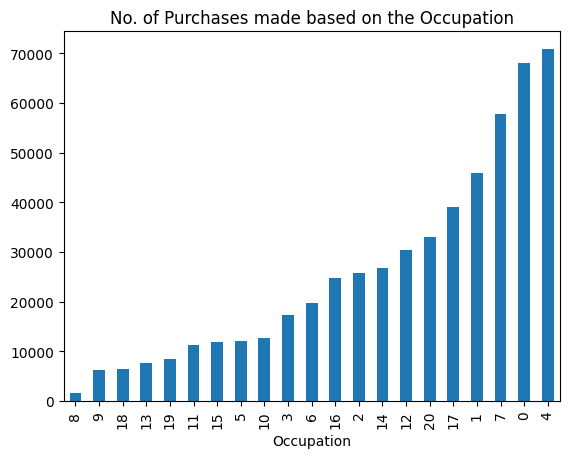

In [122]:
data.groupby('Occupation').size().sort_values().plot(kind='bar')
plt.title('No. of Purchases made based on the Occupation')
plt.show()

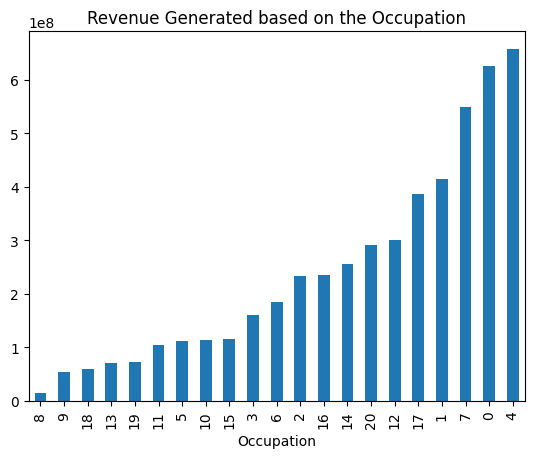

In [123]:
data.groupby('Occupation').sum(numeric_only=True)['Purchase'].sort_values().plot(kind='bar')
plt.title('Revenue Generated based on the Occupation')
plt.show()

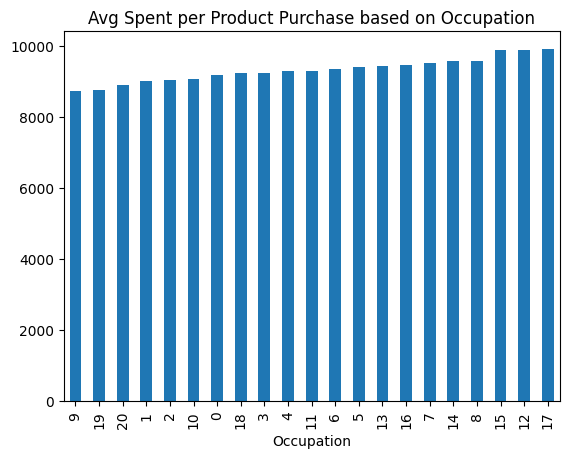

In [124]:
data.groupby('Occupation').mean(numeric_only=True)['Purchase'].sort_values().plot(kind='bar')
plt.title('Avg Spent per Product Purchase based on Occupation')
plt.show()

Conclusion: People from occupations like 12,15, 17 are buying expensive products as compared to people from occupations like 0 or 4, as the former's spent per product purchase is higher than latter's. But due to latter's overall greater participation in the sale, it compensates for greater overall revenue.

<Axes: xlabel='Occupation', ylabel='count'>

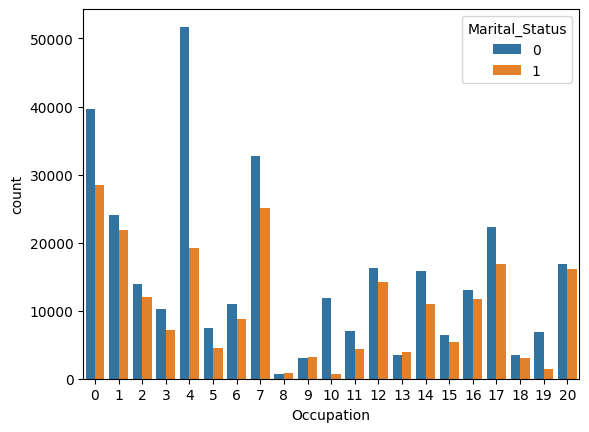

In [65]:
sns.countplot(data=data, x ='Occupation', hue='Marital_Status')

Conclusion: For occupations 8, 9 ,13 married people are making more overall no. of purchases as compared to unmarried people from their occupation
For rest of the occupation unmarried people are participating more as compared to married people from their occupation.

For some occupations, there is not much difference in the participation by married and unmarried people,e.g. 1,2,8. But there are some occupations like 10,19,4 where the difference is much larger.

<Axes: xlabel='Occupation', ylabel='count'>

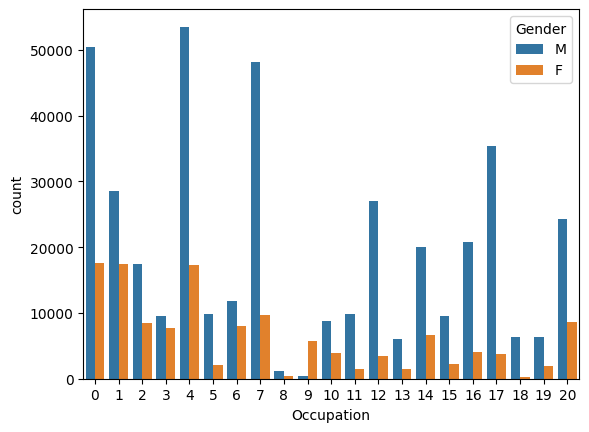

In [70]:
sns.countplot(data=data, x ='Occupation', hue='Gender')

Conclusion: Occupation 9 is the only occupation where overall participation by females is much higher compared to males from that occupation.

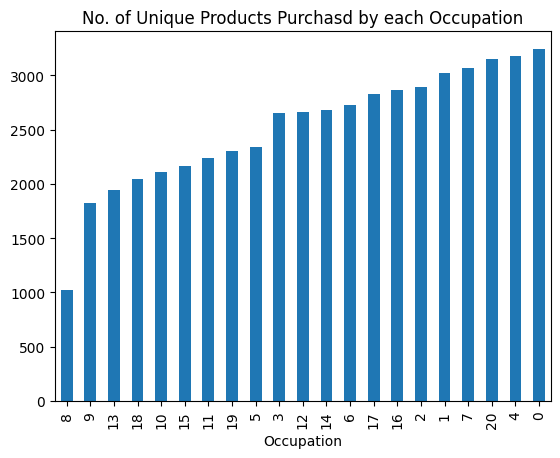

In [125]:
data.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')
plt.title('No. of Unique Products Purchasd by each Occupation')
plt.show()

Conclusion: The bar graph showing the range of unique products bought by each occupation helps manage inventory and analyze product catering for different occupation categories.

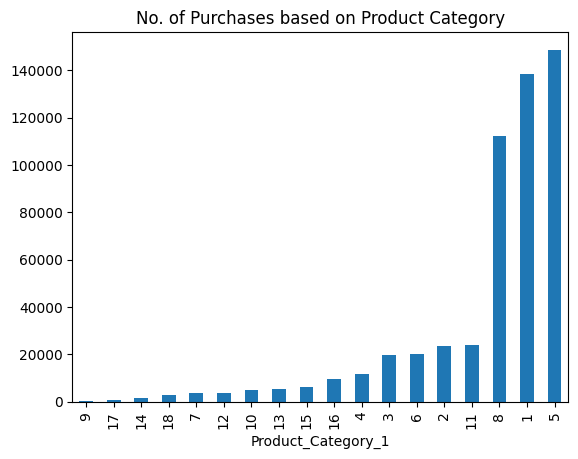

In [126]:
data.groupby('Product_Category_1').size().sort_values().plot(kind='bar')
plt.title('No. of Purchases based on Product Category')
plt.show()

Conclusion: Most of the products purchased are from Product Categories 1,5,8.

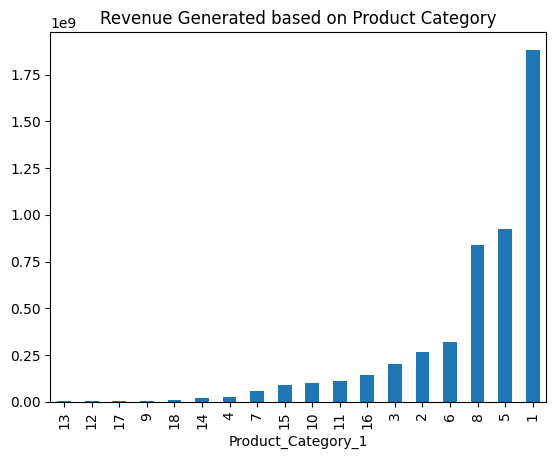

In [127]:
data.groupby('Product_Category_1').sum(numeric_only=True)['Purchase'].sort_values().plot(kind='bar')
plt.title('Revenue Generated based on Product Category')
plt.show()

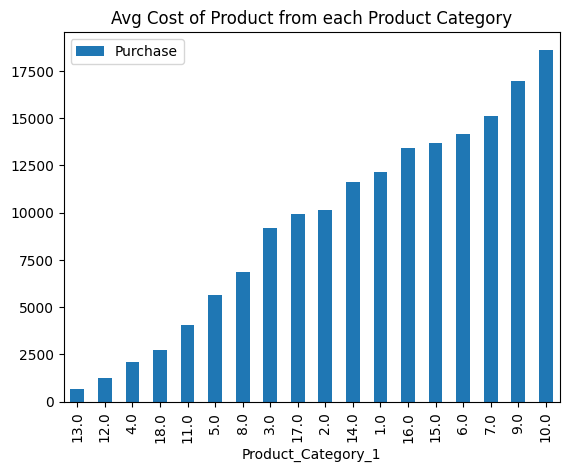

In [128]:
m = data.groupby(['Product_ID']).mean(numeric_only=True)[['Product_Category_1','Purchase']].reset_index()
m.groupby('Product_Category_1').mean(numeric_only=True).sort_values(by='Purchase').plot(kind='bar')
plt.title('Avg Cost of Product from each Product Category')
plt.show()

Conclusion: Products from category 10 are most expensive,but their purchase is less, hence resulting in lesser overall revenue generation.

Products from category 13 are cheap, but since their purchase is low, hence overall revenue generated from product 13 is least.

Products from categories 1,8,5 cost about average, and their purchase is quite high, hence overall revenue generated from these categories is high.

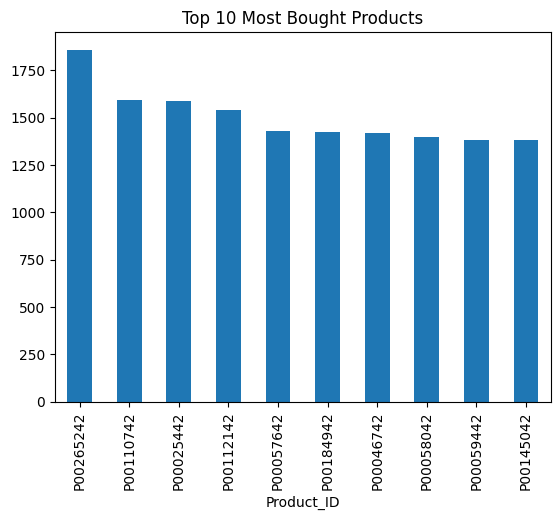

In [129]:
data.groupby('Product_ID').size().sort_values().nlargest(10).plot(kind='bar') 
plt.title('Top 10 Most Bought Products')
plt.show()

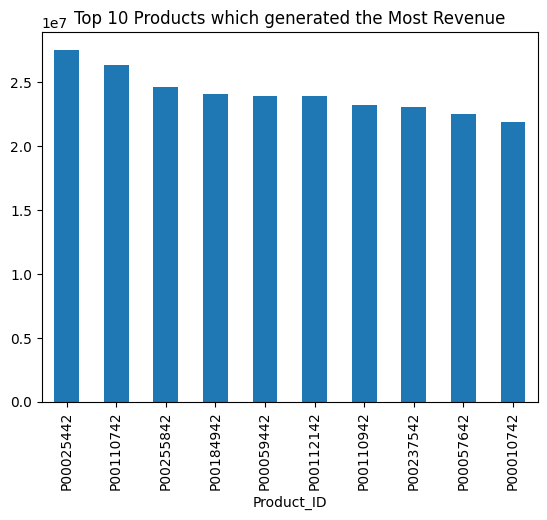

In [130]:
data.groupby('Product_ID').sum(numeric_only = True)['Purchase'].sort_values().nlargest(10).plot(kind='bar')
plt.title('Top 10 Products which generated the Most Revenue')
plt.show()

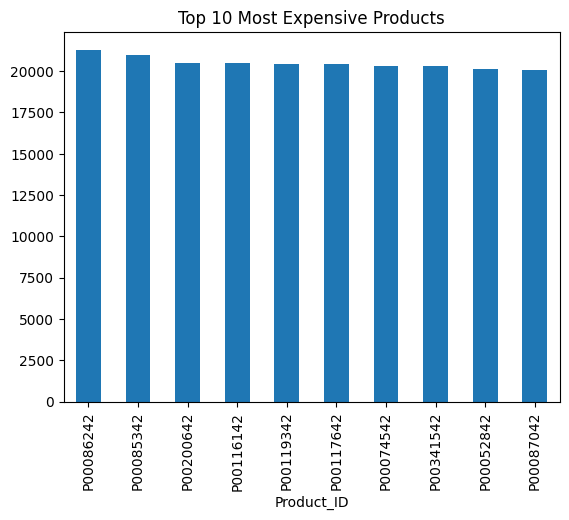

In [131]:
data.groupby('Product_ID').mean(numeric_only = True)['Purchase'].sort_values().nlargest(10).plot(kind='bar')
plt.title('Top 10 Most Expensive Products')
plt.show()

## Combining Gender and Marital Status

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [132]:
lst=[]
for i in range(len(data)):
    lst.append(data['Gender'][i]+'_'+str(data['Marital_Status'][i]))

In [133]:
data['Marital_Gender'] = lst
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

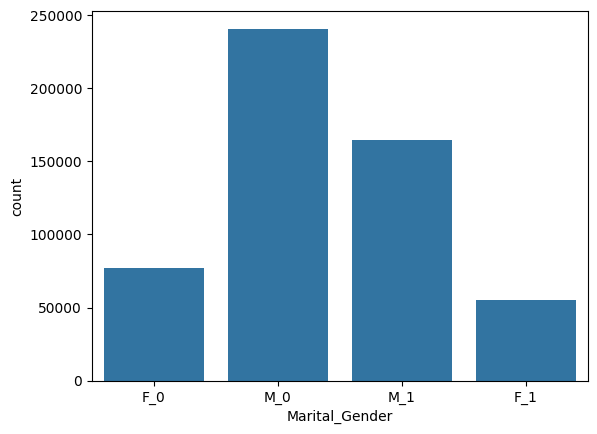

In [12]:
sns.countplot(data=data, x='Marital_Gender')

Conclusion : Participation in the sale by unmarried men is the highest.

<Axes: xlabel='Age', ylabel='count'>

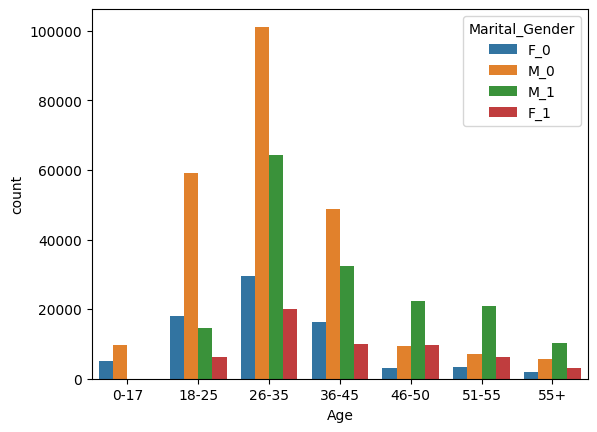

In [20]:
sns.countplot(data=data.sort_values(by='Age'),x='Age', hue='Marital_Gender')

Conclusion: Participation of unmarried males in the age group of 26-35 is the highest. Most of the business comes from the age group 18-45, with unmarried men participating the most.

<Axes: xlabel='Product_Category_1', ylabel='count'>

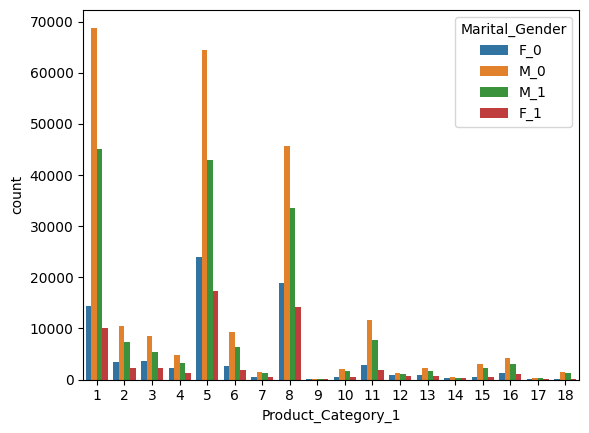

In [14]:
sns.countplot(data=data,x='Product_Category_1', hue='Marital_Gender')

Conclusion: Products in categories 1, 5, and 8 had high sales, with most of the purchases coming from unmarried men.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

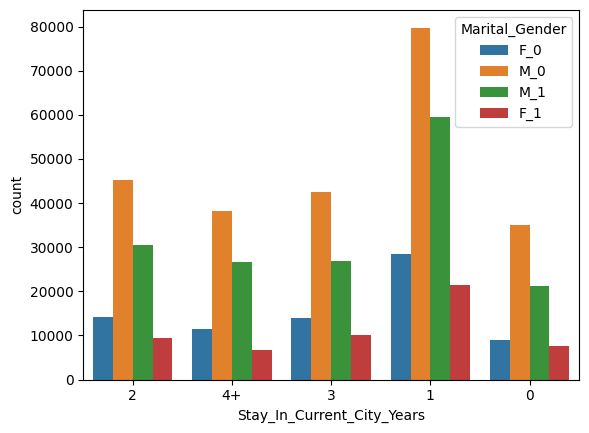

In [16]:
sns.countplot(data=data,x='Stay_In_Current_City_Years', hue='Marital_Gender')

Conclusion: Unmarried males who have lived in the current city for 1 year, had the highest participation in the  sale.

<Axes: xlabel='City_Category', ylabel='count'>

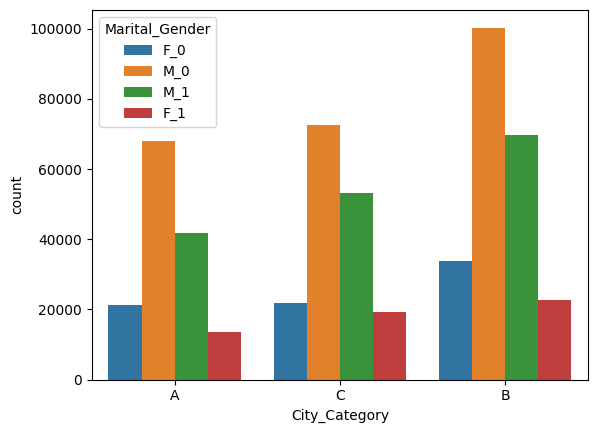

In [134]:
sns.countplot(data=data,x='City_Category', hue='Marital_Gender')

Conclusion: Irrespective of city of residence, unmarried men participated more in the sale, with highest from city B.

Conclusion: From the above two conclusion, Unmarried males, particularly those who have lived in their current city for just one year, had the highest participation in the sale, with the greatest involvement seen in City B.